In [29]:
class Camera:
    def __init__(self, f, ap, sd):
        self.focal_length = f
        self.aperture_fstop = ap
        self.diagonal_sensor_size = sd
        
        # Calcuate Circle of Confusion using Zeiss formula
        self.circle_of_confusion = self.zeissFormula()
        
        self.hyperfocal_distance = self.hyperfocalDistanceFormula()
        
    def hyperfocalDistanceFormula(self):
        return (self.focal_length**2/(self.aperture_fstop*self.circle_of_confusion))+self.focal_length
        
    def zeissFormula(self):
        return self.diagonal_sensor_size/1730
    
    def __str__(self):
        return "Camera : {f: " + str(self.focal_length) \
            + ", Ap: " + str(self.aperture_fstop) \
            + ", sd: " + str(self.diagonal_sensor_size) \
            + ", H: " + str(self.hyperfocal_distance) \
            + ", CoC: " + str(self.circle_of_confusion) \
            + "}"
        
        

In [30]:
def nearDoF(cam, fd):
    return (fd*(cam.hyperfocal_distance-cam.focal_length))/(cam.hyperfocal_distance+fd-2*cam.focal_length)

def farDoF(cam, fd):
    return (fd*(cam.hyperfocal_distance-cam.focal_length))/(cam.hyperfocal_distance-fd)

In [31]:
import math

diagonal_sensor_size = math.sqrt(3.674**2+2.76**2)
cam = Camera(4, 1.8, diagonal_sensor_size)
print(cam)

focus_dist = 300

print("nearDoF: " + str(nearDoF(cam, focus_dist)))
print("farDoF: " + str(farDoF(cam, focus_dist)))

Camera : {f: 4, Ap: 1.8, sd: 4.595201410166914, H: 3350.486128715564, CoC: 0.0026561857862236497}
nearDoF: 275.6210464880169
farDoF: 329.11011434016586


Camera : {f: 4, Ap: 1.8, sd: 4.595201410166914, H: 3350.486128715564, CoC: 0.0026561857862236497}


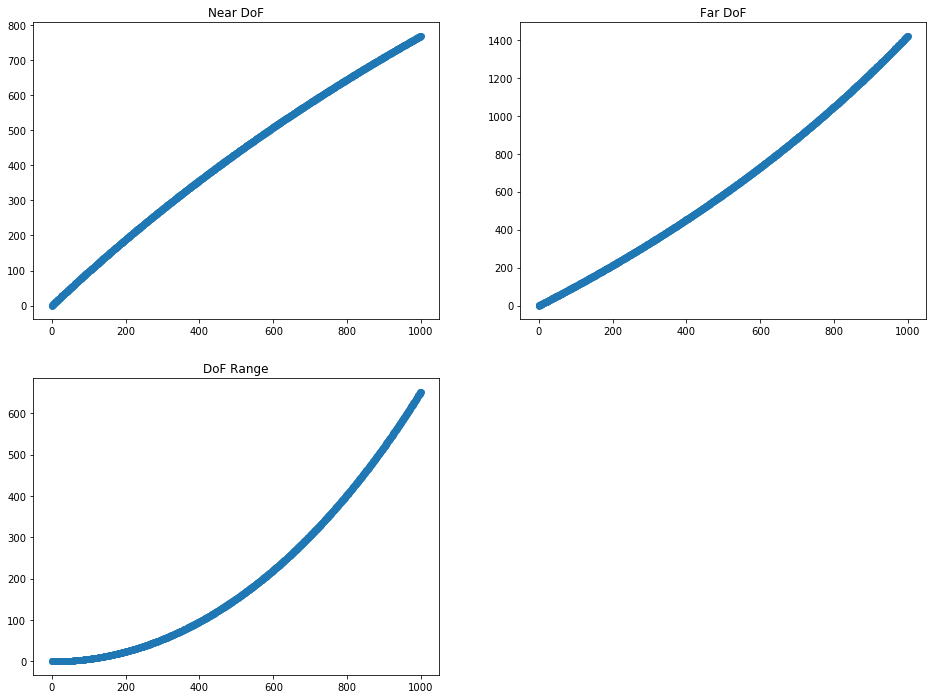

In [37]:
import numpy as np
import matplotlib.pyplot as plt

print(cam)

nearResult = np.ones(1000) * -1
farResult = np.ones(1000) * -1

for i in range(0, 1000):
    nearResult[i] = nearDoF(cam, i)
    farResult[i] = farDoF(cam, i)
    
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.title("Near DoF")
plt.scatter(np.arange(0, 1000), nearResult)

plt.subplot(222)
plt.title("Far DoF")
plt.scatter(np.arange(0, 1000), farResult)

plt.subplot(223)
plt.title("DoF Range")
plt.scatter(np.arange(0, 1000), farResult-nearResult)

plt.show()
